In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [46]:
df=pd.read_csv('Dataset/filtered.csv')

In [47]:
df.shape

(1406625, 293)

In [48]:
dfs=df.sample(n = 7000) 

In [49]:
# Putting feature variable to X
X =dfs.drop(['TARGET'], axis=1)
X.head()
print(X.shape)

(7000, 292)


In [50]:
y = dfs['TARGET']
y.head()

796599    0
698442    1
597099    0
500737    0
210681    0
Name: TARGET, dtype: int64

In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=70)

In [52]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4900, 292)
(4900,)
(2100, 292)
(2100,)


# Feature Scaling/Transformartions

In [53]:
scaler = StandardScaler()
X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT',
         'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
         'DAYS_TERMINATION']] = scaler.fit_transform(X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING',
                                                               'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']])

X_train.head()

C:\Users\HITESH KRISHNA\AppData\Local\Temp\ipykernel_27376\1367030613.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,Unnamed: 0,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
293455,294812,-0.574740,-0.621838,-0.931480,-1.050072,-0.844203,0.598335,1.578620,1.992195,0.479888,...,0,0,0,0,0,0,0,0,0,0
916541,920938,-0.574740,-0.408540,0.055280,1.488029,0.068448,-1.053488,0.482737,-0.496017,0.950399,...,0,0,0,0,0,0,0,0,0,0
432433,434490,-0.574740,-0.408540,-0.812121,-0.965468,-0.713824,-0.039114,-1.454257,-0.489308,0.474499,...,0,0,1,0,0,0,0,0,0,0
385094,386859,2.212224,-0.165048,-0.852703,-0.700552,-0.844203,0.756769,-0.461157,-0.523755,0.943025,...,0,0,0,1,0,0,0,0,0,0
538079,540742,-0.574740,-0.652031,0.287718,-0.511746,0.159714,0.154310,1.512627,1.992195,-2.328715,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X_test = X_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT',
         'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
         'DAYS_TERMINATION']] = scaler.transform(X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING',
                                                               'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']])

X_test.head()

C:\Users\HITESH KRISHNA\AppData\Local\Temp\ipykernel_27376\250791982.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = X_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,Unnamed: 0,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
1295578,1302001,-0.574740,0.808917,-0.813315,-0.574137,-0.844203,-1.417766,0.503201,-0.550245,0.876093,...,0,0,0,0,0,0,0,0,0,0
364586,366240,-0.574740,-0.067652,-0.847929,-0.999767,-0.752938,0.598335,1.813846,1.992195,0.385729,...,0,1,0,0,0,0,0,0,0,0
687273,690592,0.818742,-1.090316,-0.692763,-0.824027,-0.583445,-1.102336,-0.792727,-0.491132,0.769739,...,0,0,0,0,0,0,0,1,0,0
177201,178033,2.212224,-0.165048,-0.283889,0.794543,-0.322688,-0.125828,-1.099234,-0.502013,-0.194823,...,0,0,0,0,0,0,0,0,0,0
708870,712284,2.212224,-0.895523,-0.358560,-0.388598,-0.218385,0.426344,-0.606477,-0.487042,0.988403,...,0,0,0,0,0,0,1,0,0,0


# Model Building

## Try out before VIF

In [55]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting Machine": GradientBoostingClassifier(n_estimators=100),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(n_estimators=100),
}


results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")


print("\nSummary of Model Accuracies:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

Decision Tree Accuracy: 0.8247619047619048
Random Forest Accuracy: 0.9076190476190477
Gradient Boosting Machine Accuracy: 0.9071428571428571
Support Vector Machine Accuracy: 0.9076190476190477
Naive Bayes Accuracy: 0.9076190476190477
AdaBoost Accuracy: 0.9033333333333333
XGBoost Accuracy: 0.9052380952380953

Summary of Model Accuracies:
Decision Tree: 0.8247619047619048
Random Forest: 0.9076190476190477
Gradient Boosting Machine: 0.9071428571428571
Support Vector Machine: 0.9076190476190477
Naive Bayes: 0.9076190476190477
AdaBoost: 0.9033333333333333
XGBoost: 0.9052380952380953


# Variance Inflation Factor Check (VIF)

In [56]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

c:\Users\HITESH KRISHNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\HITESH KRISHNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Features,VIF
232,NAME_GOODS_CATEGORY_Fitness,NaN
236,NAME_GOODS_CATEGORY_Insurance,NaN
247,NAME_GOODS_CATEGORY_Weapon,NaN
249,NAME_PORTFOLIO_Cars,NaN
255,CHANNEL_TYPE_Car dealer,NaN


In [57]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['PRODUCT_COMBINATION_POS others without interest', 'NAME_GOODS_CATEGORY_Audio/Video', 'NAME_GOODS_CATEGORY_Clothing and Accessories', 'NAME_GOODS_CATEGORY_Computers', 'NAME_GOODS_CATEGORY_Construction Materials', 'NAME_GOODS_CATEGORY_Consumer Electronics', 'NAME_GOODS_CATEGORY_Furniture', 'NAME_GOODS_CATEGORY_Gardening', 'NAME_GOODS_CATEGORY_Homewares', 'NAME_GOODS_CATEGORY_Jewelry', 'NAME_GOODS_CATEGORY_Medical Supplies', 'NAME_GOODS_CATEGORY_Mobile', 'NAME_GOODS_CATEGORY_Office Appliances', 'NAME_GOODS_CATEGORY_Other', 'NAME_GOODS_CATEGORY_Photo / Cinema Equipment', 'NAME_GOODS_CATEGORY_Sport and Leisure', 'NAME_GOODS_CATEGORY_Tourism', 'NAME_GOODS_CATEGORY_Vehicles', 'NAME_GOODS_CATEGORY_XNA', 'NAME_GOODS_CATEGORY_Auto Accessories', 'CODE_REJECT_REASON_XNA', 'NAME_PORTFOLIO_POS', 'CODE_REJECT_REASON_XAP', 'CNT_CHILDREN', 'ORGANIZATION_TYPE_XNA', 'NAME_CONTRACT_TYPE_y_Consumer loans', 'NAME_CONTRACT_TYPE_y_Revolving loans', 'NAME_CASH_LOAN_PURPOSE_XAP', 'NAME_FAMILY_STATUS_Widow', '

In [58]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

,Unnamed: 0,AMT_INCOME_TOTAL,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START_x,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,...,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Weapon,NAME_PORTFOLIO_Cars,CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,PRODUCT_COMBINATION_Card X-Sell
293455,294812,-0.621838,-1.050072,0.598335,1.578620,0.479888,1.111527,1.222871,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
916541,920938,-0.408540,1.488029,-1.053488,0.482737,0.950399,-0.690126,-0.942899,1.663841,-0.286847,...,0,0,0,0,0,0,0,0,0,0
432433,434490,-0.408540,-0.965468,-0.039114,-1.454257,0.474499,-0.240533,0.913475,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
385094,386859,-0.165048,-0.700552,0.756769,-0.461157,0.943025,-0.340953,-0.014712,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
538079,540742,-0.652031,-0.511746,0.154310,1.512627,-2.328715,0.978290,0.604079,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

,Unnamed: 0,AMT_INCOME_TOTAL,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START_x,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,...,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Weapon,NAME_PORTFOLIO_Cars,CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,PRODUCT_COMBINATION_Card X-Sell
1295578,1302001,0.808917,-0.574137,-1.417766,0.503201,0.876093,-0.631056,0.913475,1.663841,-0.286847,...,0,0,0,0,0,0,0,0,0,0
364586,366240,-0.067652,-0.999767,0.598335,1.813846,0.385729,0.996667,-1.252295,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
687273,690592,-1.090316,-0.824027,-1.102336,-0.792727,0.769739,-0.339641,-0.942899,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
177201,178033,-0.165048,0.794543,-0.125828,-1.099234,-0.194823,0.345578,0.294684,1.663841,-0.286847,...,0,0,0,0,0,0,0,0,0,1
708870,712284,-0.895523,-0.388598,0.426344,-0.606477,0.988403,-0.474847,-1.252295,1.663841,2.192074,...,0,0,0,0,0,0,0,0,0,0


In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\Users\HITESH KRISHNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
26,FLAG_CONT_MOBILE_1,27.68
124,NAME_CLIENT_TYPE_Repeater,6.19
9,DEF_60_CNT_SOCIAL_CIRCLE,4.29
8,DEF_30_CNT_SOCIAL_CIRCLE,4.28
0,Unnamed: 0,4.06
...,...,...
129,NAME_GOODS_CATEGORY_Fitness,NaN
130,NAME_GOODS_CATEGORY_Insurance,NaN
131,NAME_GOODS_CATEGORY_Weapon,NaN
132,NAME_PORTFOLIO_Cars,NaN


In [61]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['FLAG_CONT_MOBILE_1', 'NAME_CLIENT_TYPE_Repeater']


In [62]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

,Unnamed: 0,AMT_INCOME_TOTAL,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START_x,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,...,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Weapon,NAME_PORTFOLIO_Cars,CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,PRODUCT_COMBINATION_Card X-Sell
293455,294812,-0.621838,-1.050072,0.598335,1.578620,0.479888,1.111527,1.222871,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
916541,920938,-0.408540,1.488029,-1.053488,0.482737,0.950399,-0.690126,-0.942899,1.663841,-0.286847,...,0,0,0,0,0,0,0,0,0,0
432433,434490,-0.408540,-0.965468,-0.039114,-1.454257,0.474499,-0.240533,0.913475,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
385094,386859,-0.165048,-0.700552,0.756769,-0.461157,0.943025,-0.340953,-0.014712,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
538079,540742,-0.652031,-0.511746,0.154310,1.512627,-2.328715,0.978290,0.604079,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

,Unnamed: 0,AMT_INCOME_TOTAL,AMT_ANNUITY_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START_x,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,...,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Weapon,NAME_PORTFOLIO_Cars,CHANNEL_TYPE_Car dealer,CHANNEL_TYPE_Channel of corporate sales,CHANNEL_TYPE_Contact center,NAME_SELLER_INDUSTRY_Jewelry,NAME_SELLER_INDUSTRY_MLM partners,NAME_SELLER_INDUSTRY_Tourism,PRODUCT_COMBINATION_Card X-Sell
1295578,1302001,0.808917,-0.574137,-1.417766,0.503201,0.876093,-0.631056,0.913475,1.663841,-0.286847,...,0,0,0,0,0,0,0,0,0,0
364586,366240,-0.067652,-0.999767,0.598335,1.813846,0.385729,0.996667,-1.252295,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
687273,690592,-1.090316,-0.824027,-1.102336,-0.792727,0.769739,-0.339641,-0.942899,-0.326108,-0.286847,...,0,0,0,0,0,0,0,0,0,0
177201,178033,-0.165048,0.794543,-0.125828,-1.099234,-0.194823,0.345578,0.294684,1.663841,-0.286847,...,0,0,0,0,0,0,0,0,0,1
708870,712284,-0.895523,-0.388598,0.426344,-0.606477,0.988403,-0.474847,-1.252295,1.663841,2.192074,...,0,0,0,0,0,0,0,0,0,0


In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

c:\Users\HITESH KRISHNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Features,VIF
9,DEF_60_CNT_SOCIAL_CIRCLE,4.29
8,DEF_30_CNT_SOCIAL_CIRCLE,4.28
0,Unnamed: 0,3.57
24,FLAG_OWN_REALTY_1,3.51
59,NAME_FAMILY_STATUS_Married,2.83
...,...,...
127,NAME_GOODS_CATEGORY_Fitness,NaN
128,NAME_GOODS_CATEGORY_Insurance,NaN
129,NAME_GOODS_CATEGORY_Weapon,NaN
130,NAME_PORTFOLIO_Cars,NaN


c:\Users\HITESH KRISHNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HITESH KRISHNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HITESH KRISHNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


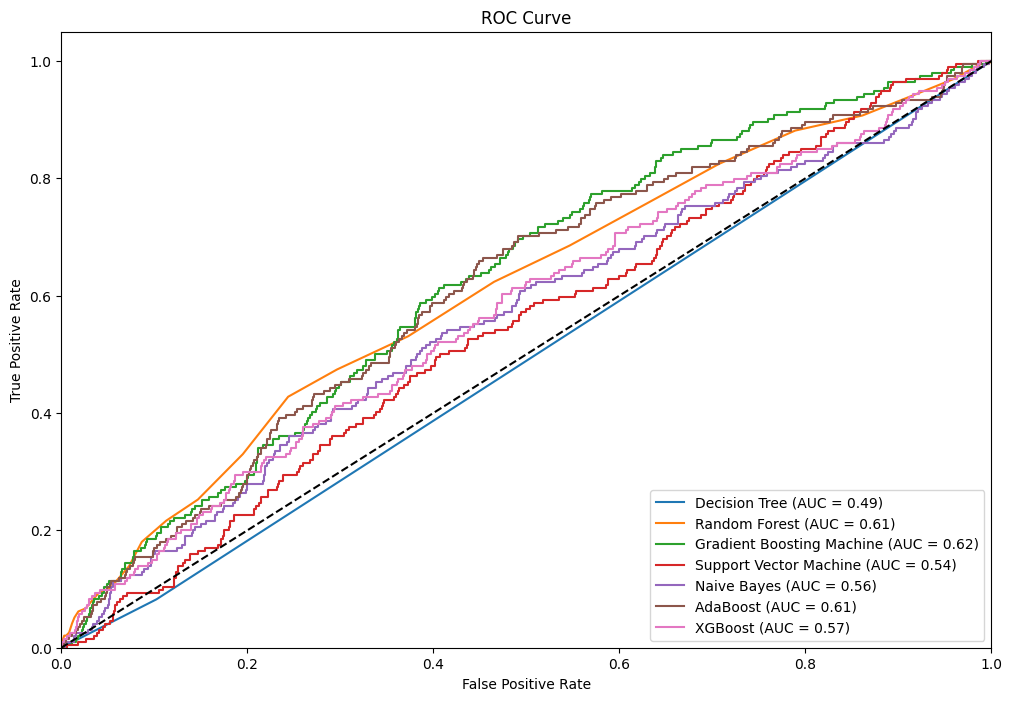

                       Model  Train Accuracy  Test Accuracy  Precision  \
0              Decision Tree        1.000000       0.822381   0.075829   
1              Random Forest        1.000000       0.907619   0.000000   
2  Gradient Boosting Machine        0.914694       0.907143   0.000000   
3     Support Vector Machine        0.910204       0.907619   0.000000   
4                Naive Bayes        0.910204       0.907619   0.000000   
5                   AdaBoost        0.911633       0.905714   0.166667   
6                    XGBoost        0.999592       0.904286   0.230769   

     Recall  F1 Score   ROC AUC  
0  0.082474  0.079012  0.490083  
1  0.000000  0.000000  0.610224  
2  0.000000  0.000000  0.624796  
3  0.000000  0.000000  0.543728  
4  0.000000  0.000000  0.559484  
5  0.005155  0.010000  0.611090  
6  0.015464  0.028986  0.571383  


In [65]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting Machine": GradientBoostingClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True),  # Enable probability for ROC AUC
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'),
}


results = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC AUC": []
}


plt.figure(figsize=(12, 8))

for name, model in models.items():

    model.fit(X_train, y_train)
    

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    

    y_test_proba = model.predict_proba(X_test)[:, 1]
    

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    

    results["Model"].append(name)
    results["Train Accuracy"].append(train_accuracy)
    results["Test Accuracy"].append(test_accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)
    results["ROC AUC"].append(roc_auc)
    

    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


results_df = pd.DataFrame(results)
print(results_df)
